<a href="https://colab.research.google.com/github/igor531205/statistic/blob/main/statistic_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Выполнил Пушкарев Игорь Игоревич. Группа 23.М08-мм. Вариант 10 таблица 4 / Вариант 6 таблица 5***

## Методы статистической обработки информации.
### Многомерная статистика: множественная регрессия, кластерный, дискриминантный, факторный анализ, случайный лес.

---

* Данные [addicts.xlsx](https://github.com/igor531205/statistic/raw/main/data/addicts.xlsx). Переменные sstati, asi4_dr, asi1_med, asi6_soc и rabdru, классифицирующая переменная end.

---

*Импортируем необходимые для дальнейшей работы библиотеки.*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
# ссылка на данные
link = 'https://github.com/igor531205/statistic/raw/main/data/addicts.xlsx'

addicts_sheet_name = 'addicts'

features = ['sstati', 'asi4_dr', 'asi1_med', 'asi6_soc', 'rabdru']
target = 'end'

# Считываем данные
use_cols = features + [target]
addicts=pd.read_excel(link, sheet_name=addicts_sheet_name, usecols=use_cols, index_col=False)

# Отключаем ограничение в отображении столбцов
pd.options.display.max_columns = None

addicts.describe()

,asi1_med,asi4_dr,asi6_soc,rabdru,sstati,end
count,280.000000,280.000000,280.000000,280.000000,280.000000,279.000000
mean,0.243607,0.279321,0.418061,8.127143,48.382143,0.275986
std,0.268022,0.055680,0.250199,5.059656,8.916601,0.447813
min,0.000000,0.090000,0.000000,0.000000,23.000000,0.000000
25%,0.000000,0.250000,0.200000,4.000000,43.000000,0.000000
50%,0.185000,0.300000,0.430000,8.000000,48.000000,0.000000
75%,0.412500,0.300000,0.600000,12.000000,54.000000,1.000000
max,1.000000,0.660000,0.970000,21.000000,72.000000,1.000000


*Проверим пропущенные значения*

In [ ]:
addicts.isna().sum()

asi1_med    0
asi4_dr     0
asi6_soc    0
rabdru      0
sstati      0
end         1
dtype: int64

Пропущен 1 целевой признак, заполним пропущенное значение используя Логистическую регрессию

In [ ]:
# Нормализация данных
scaler = StandardScaler()
addicts[features] = scaler.fit_transform(addicts[features])

# Отделим пропущенные данные
train_data = addicts[addicts[target].notna()]
predict_data = addicts[addicts[target].isna()]

# Обучение модели
model = LogisticRegression(max_iter=1000)
model.fit(train_data[features], train_data[target])

# Предсказание пропущенного значения
predicted_value = model.predict(predict_data[features])
print(f'Пропущенное значение = {predicted_value[0]}')

# Заполнение пропущенного значения
addicts.loc[addicts[target].isna(), target] = predicted_value[0]

Пропущенное значение = 0.0


In [ ]:
# Повторная проверка
addicts.isna().sum()

asi1_med    0
asi4_dr     0
asi6_soc    0
rabdru      0
sstati      0
end         0
dtype: int64

*Описательная статистика для нормализованных данных и заполненных пропущенных значениях*

In [ ]:
addicts.describe()

,asi1_med,asi4_dr,asi6_soc,rabdru,sstati,end
count,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,280.000000
mean,-1.332268e-16,3.298948e-16,-2.030122e-16,-8.723181e-18,-2.791418e-16,0.275000
std,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,0.447314
min,-9.105331e-01,-3.406262e+00,-1.673905e+00,-1.609140e+00,-2.851713e+00,0.000000
25%,-9.105331e-01,-5.275497e-01,-8.731100e-01,-8.171568e-01,-6.046900e-01,0.000000
50%,-2.190566e-01,3.720478e-01,4.780462e-02,-2.517375e-02,-4.293420e-02,0.000000
75%,6.312727e-01,3.720478e-01,7.284807e-01,7.668093e-01,6.311728e-01,1.000000
max,2.827178e+00,6.849150e+00,2.209952e+00,2.548771e+00,2.653494e+00,1.000000


---

* Построить матрицу факторных нагрузок. Проинтерпретировать главные компоненты, определить вклад первых двух в общую дисперсию и построить двумерную диаграмму первых двух факторов.

---

In [ ]:
# Метод главных компонент PCA
pca = PCA()
X_pca = pca.fit_transform(addicts[features])

# Получение факторных нагрузок
loadings = pca.components_.T

# Создание DataFrame для факторных нагрузок
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(len(features))], index=features)
loadings_df

,PC1,PC2,PC3,PC4,PC5
sstati,-0.518181,0.173608,0.310123,-0.719475,0.295851
asi4_dr,-0.547399,-0.211189,-0.287766,0.464883,0.597351
asi1_med,-0.407621,0.491046,0.492376,0.484558,-0.339836
asi6_soc,-0.514830,-0.375138,-0.363232,-0.149077,-0.663370
rabdru,0.025253,-0.737160,0.668314,0.096016,0.009751


*   Первая главная компонента PC1 связана с оценкой уровня тревожности (sstati), употреблением наркотиков (asi4_dr) и семейными отношениями (asi6_soc), а отрицательные значения говорят о том, что увеличение этих признаков соответствует уменьшению значения PC1.
*   Вторая главная компонента PC2 сильно связана с оценкой риска употребления наркотиков (rabdru), а также с медицинским статусом (asi1_med).

In [ ]:
# Вклад первых двух компонент в общую дисперсию
explained_variance = pca.explained_variance_ratio_[:2]
print(f'Вклад первых двух компонент: {explained_variance[0]:.3f} и {explained_variance[1]:.3f}')
print(f'Суммарный вклад в дисперсию: {explained_variance.sum():.3f}')

Вклад первых двух компонент: 0.310 и 0.215
Суммарный вклад в дисперсию: 0.525


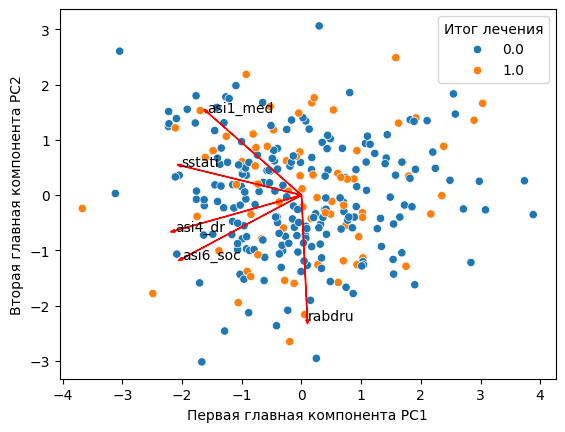

In [ ]:
# Визуализация первых двух главных компонент и данных
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=addicts[target])

# Отображение векторов факторных нагрузок
for i in range(len(features)):
    plt.arrow(0, 0, loadings_df.iloc[i, 0] * max(X_pca[:, 0]), loadings_df.iloc[i, 1] * max(X_pca[:, 1]),
              color='r', width=0.005, head_width=0.05)
    plt.text(loadings_df.iloc[i, 0] * max(X_pca[:, 0]), loadings_df.iloc[i, 1] * max(X_pca[:, 1]),
             s=features[i])
plt.xlabel('Первая главная компонента PC1')
plt.ylabel('Вторая главная компонента PC2')
plt.legend(title='Итог лечения')
plt.show()

*   Первая главная компонента PC1 составляет 31.0% общей дисперсии данных.
*   Вторая главная компонента PC2 составляет 21.5% общей дисперсии данных.
*   Суммарный вклад первых двух компонент в общую дисперсию составляет 52.5%, более половины данных в исходном наборе можно объяснить всего двумя главными компонентами.

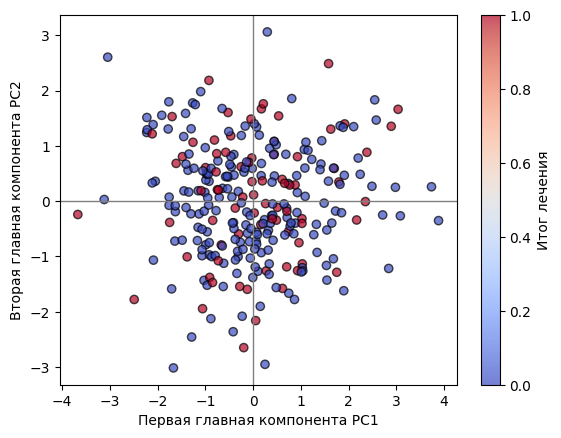

In [ ]:
# Построение двумерной диаграммы первых двух факторов
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=addicts[target], cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.colorbar(label='Итог лечения')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.xlabel('Первая главная компонента PC1')
plt.ylabel('Вторая главная компонента PC2')
plt.show()

---

* Построить дискриминантную функцию, оценить граничное значение в случае эвристической и байесовской процедуры, построить матрицу классификации, вычислить точность классификации. Для наглядности можно построить двумерную диаграмму с одной из осей в виде дискриминантной функции и с другой в виде одного из признаков с выделением разных классов.

---

In [ ]:
# Подготовка данных
X = addicts[features]
y = addicts[target]

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=81)

# Обучение дискриминантной модели
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = lda.predict(X_test)

# Точность
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность дискриминантной модели: {accuracy:.3f}')

Точность дискриминантной модели: 0.726


*Построим матрицу классификации*

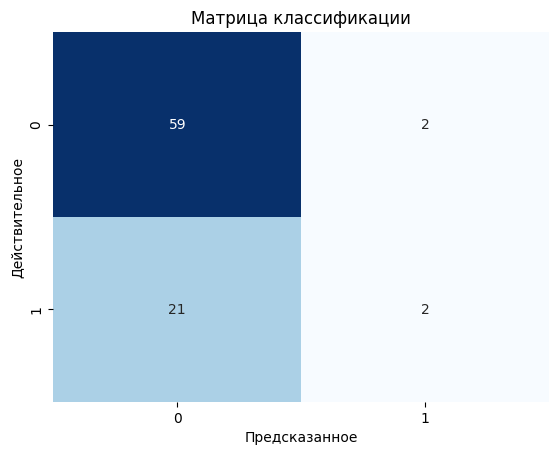

In [ ]:
# Матрица классификации
conf_matrix = confusion_matrix(y_test, y_pred)

# Построение матрицы классификации
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Предсказанное')
plt.ylabel('Действительное')
plt.title('Матрица классификации')
plt.show()

*   TN - модель правильно предсказала итог лечения (0 – программа сорвана) 59 раз;
*   FP - модель неверно предсказала итог лечения (0 – программа сорвана) 2 раза;
*   FN - модель неверно предсказала итог лечения (1 – программа лечения выполнена) 21 раз;
*   TP - модель правильно предсказала итог лечения (1 – программа лечения выполнена) 2 раза.

По матрице можно оценить, что модель хорошо предсказывает когда программа лечения сорвана.

In [ ]:
# Вычисление дискриминантных значений
lda_values = lda.decision_function(addicts[features])

# Расчет эвристического граничного значения
heuristic_threshold = np.mean(lda_values)

# Расчет Байесовского граничного значения
priors = lda.priors_
bayesian_threshold = (np.log(priors[1] / priors[0]) - lda.intercept_[0]) / lda.coef_[0][0]

print(f'Эвристическое граничное значение: {heuristic_threshold:.3f}')
print(f'Байесовское граничное значение: {bayesian_threshold:.3f}')

Эвристическое граничное значение: -1.018
Байесовское граничное значение: -0.612


*Построим двумерные диаграммы*

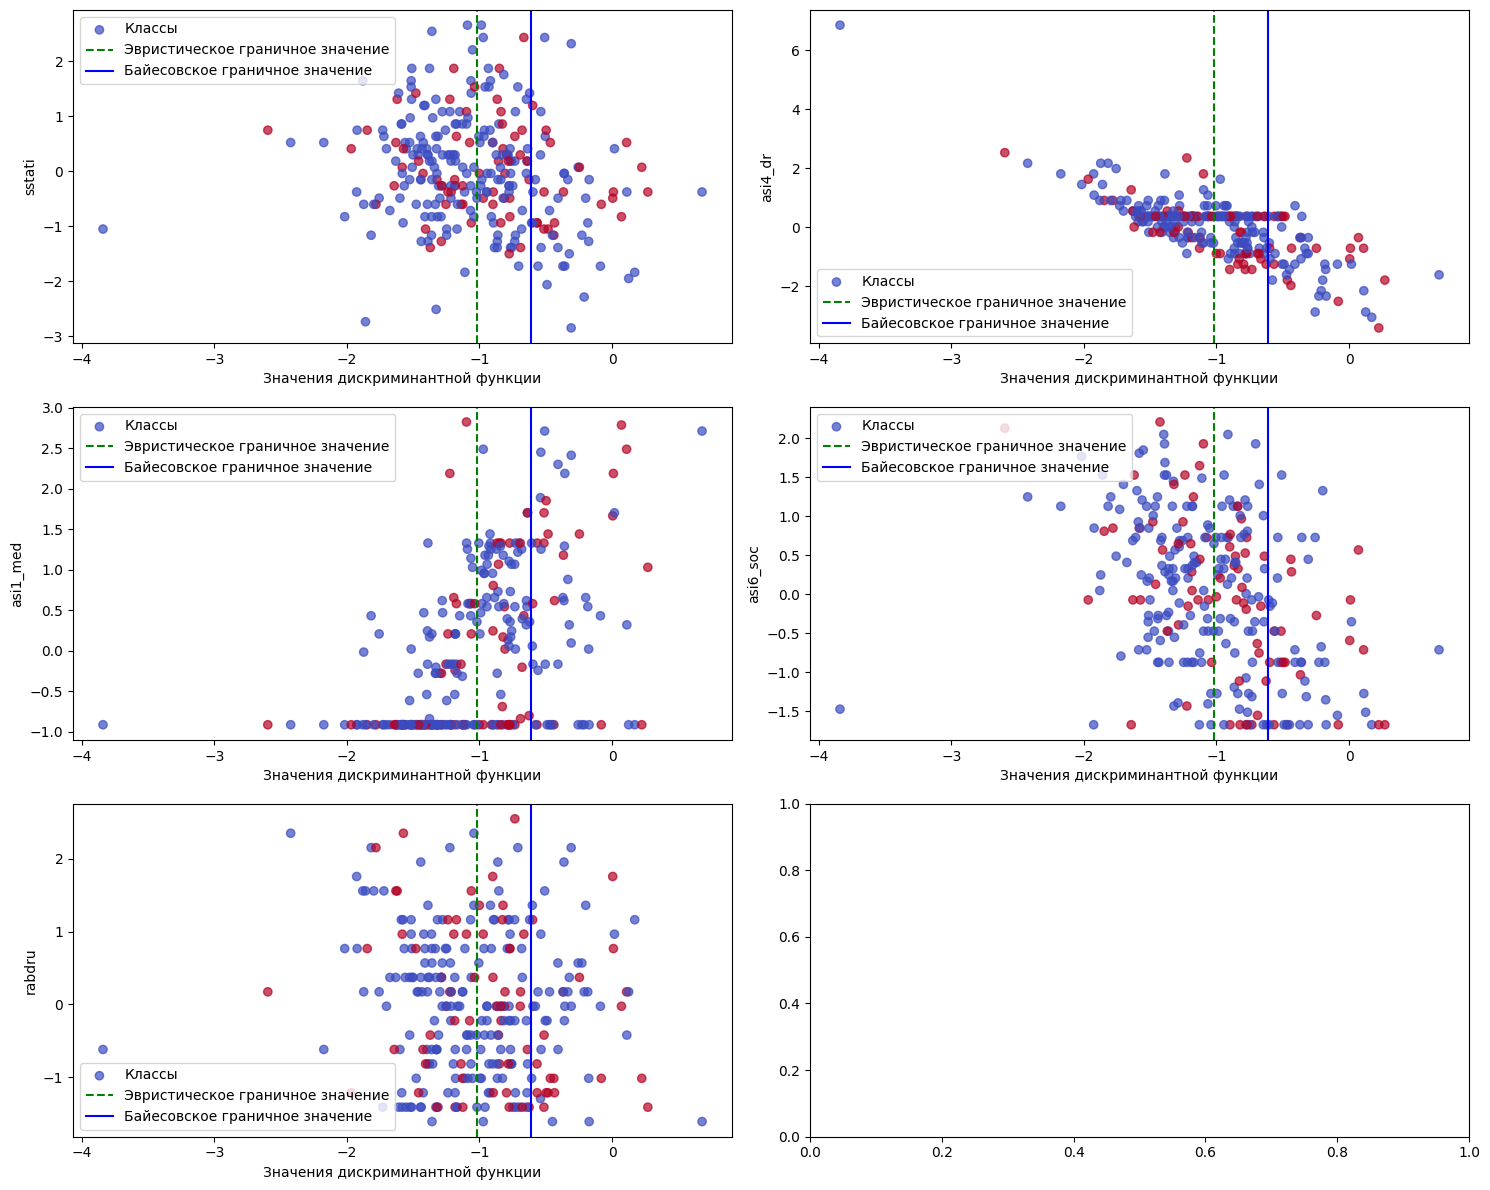

In [ ]:
# Создание фигур и осей для диаграмм
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

# Построение двумерных диаграмм в цикле
for i, feature in enumerate(features):
    ax = axes[i]
    ax.scatter(lda_values, addicts[feature], c=addicts[target], cmap='coolwarm', alpha=0.7, label='Классы')
    ax.axvline(x=heuristic_threshold, color='g', linestyle='--', label='Эвристическое граничное значение')
    ax.axvline(x=bayesian_threshold, color='b', linestyle='-', label='Байесовское граничное значение')
    ax.set_xlabel('Значения дискриминантной функции')
    ax.set_ylabel(f'{feature}')
    ax.legend()

plt.tight_layout()
plt.show()

*   Классы смешаны, нет четкого разделения между ними вдоль значения дискриминантной функции.
*   Байесовское граничное значение ближе к центру скопления точек, а Эвристическое граничное значение смещено в право.

Прослеживается сложность в разграничении между классами, используя только один из признаков, поэтому необходима комбинирование нескольких признаков.

---

* Постройте дерево классификации, используя информационный выигрыш от объединения. Сравните полученное дерево с и тем, что получается при использовании стандартной процедуры.

---

In [ ]:
# Модель с информационным выигрышем
tree_gain = DecisionTreeClassifier(criterion='entropy', random_state=3)
tree_gain.fit(X_train, y_train)

# Стандартная модель
tree_standard = DecisionTreeClassifier(criterion='gini', random_state=3)
tree_standard.fit(X_train, y_train)

# Сравнение точности двух деревьев
y_pred_gain = tree_gain.predict(X_test)
accuracy_gain = accuracy_score(y_test, y_pred_gain)
y_pred_standard = tree_standard.predict(X_test)
accuracy_standard = accuracy_score(y_test, y_pred_standard)

print(f'Точность модели с информационным выигрышем: {accuracy_gain:.3f}')
print(f'Точность стандартной модели: {accuracy_standard:.3f}')

Точность модели с информационным выигрышем: 0.655
Точность стандартной модели: 0.607


*Построим матрицы классификации*

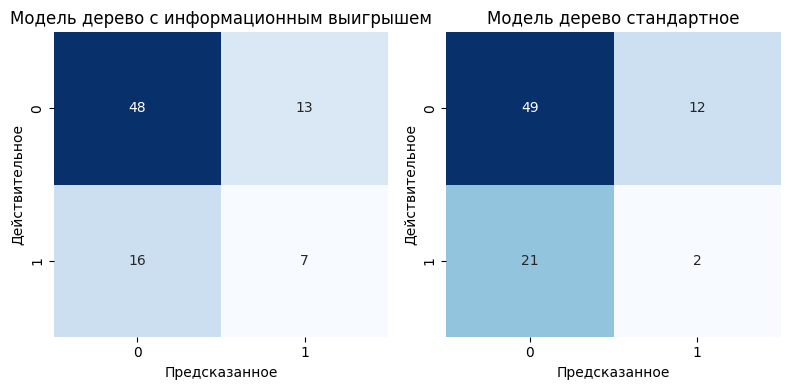

In [ ]:
# Создание подграфиков
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Модели
models = {'Модель дерево с информационным выигрышем': y_pred_gain,
          'Модель дерево стандартное': y_pred_standard}

# Построение матрицы в цикле
for ax, (name, y_pred) in zip(axes, models.items()):
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'{name}')
    ax.set_xlabel('Предсказанное')
    ax.set_ylabel('Действительное')

plt.tight_layout()
plt.show()

Как видно Модель дерево с информационным выигрышем предсказывает итог лечения (1 – программа лечения выполнена) немного лучше, чем Модель дерево стандартное.

*Построим модель дерево с информационным выигрышем*

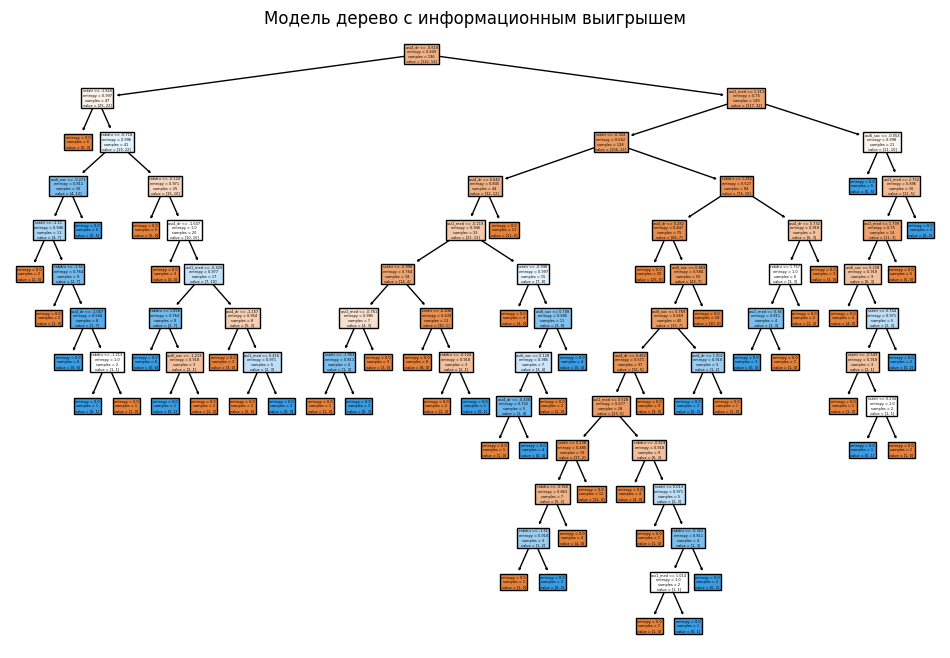

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(tree_gain, filled=True, feature_names=X.columns)
plt.title('Модель дерево с информационным выигрышем')
plt.show()

*Построим модель дерево стандартное*

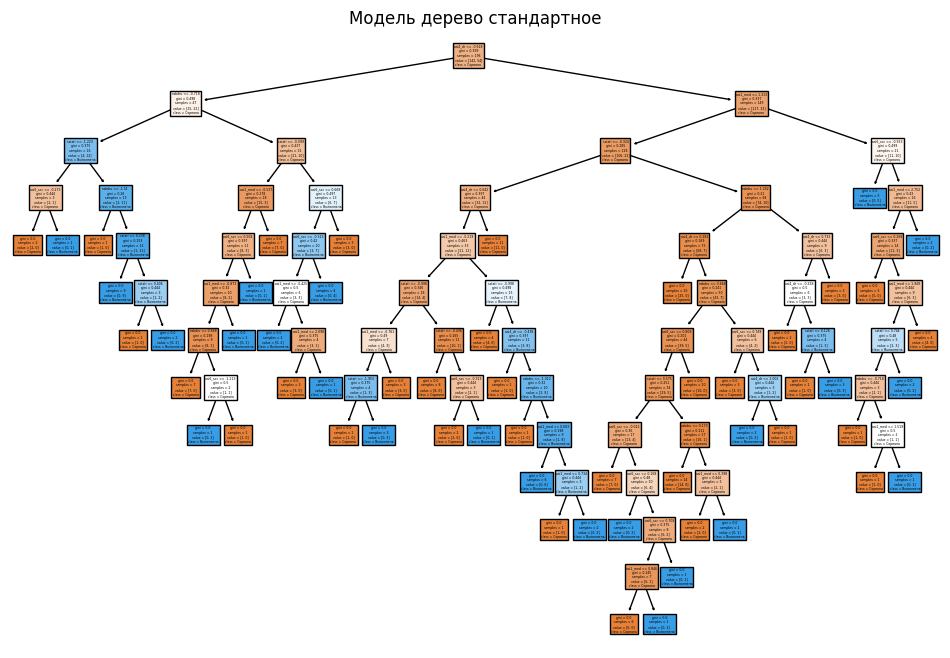

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(tree_standard, filled=True, feature_names=X.columns, class_names=['Сорвана', 'Выполнена'])
plt.title('Модель дерево стандартное')
plt.show()